# Examples using the ```BLLL()```` class
02/06/20 updated: ```BLLL()``` does not take adjacency matrix as input but ```networkx.graph.Graph``` representation of the network.


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## create some network 

/Users/Gneiss/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


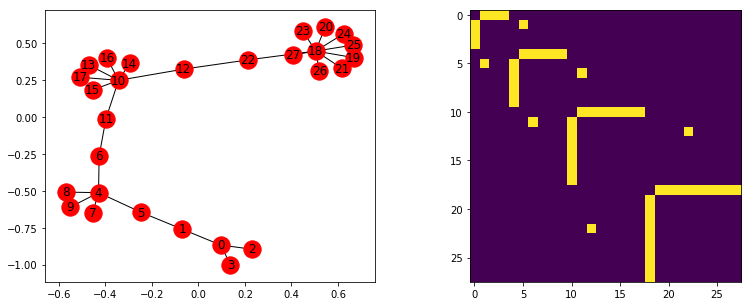

In [2]:
import networkx as nx

my_mat = np.zeros((4+6+8+10, 4+6+8+10))
my_mat[0:4,0:4]= nx.to_numpy_array(nx.star_graph(3))
my_mat[4:4+6,4:4+6]= nx.to_numpy_array(nx.star_graph(5))
my_mat[4+6:4+6+8,4+6:4+6+8]= nx.to_numpy_array(nx.star_graph(7))
my_mat[4+6+8:,4+6+8:]= nx.to_numpy_array(nx.star_graph(9))

my_mat[1,5] = 1
my_mat[5,1] = 1
my_mat[11,6] = 1
my_mat[6,11] = 1
my_mat[22,12] = 1
my_mat[12,22] = 1


plt.figure(figsize=(13, 5))
plt.subplot(1,2,1)
nx.draw_networkx(nx.from_numpy_array(my_mat))
plt.subplot(1,2,2)
plt.imshow(my_mat)
plt.show()

## Using the ```BLLL()``` class:

### import the class from the file BLLL.py

In [3]:
from BLLL import *

### initialize with chosen positions and coverage range

In [4]:
my_net = nx.from_numpy_array(my_mat)
my_algo = BLLL(starting_positions=np.array([2,3]), network_nx=my_net, cover_ranges=1)

### see the attributes:

In [5]:
my_algo.agents_pos

[array([2, 3])]

In [6]:
my_algo.potentials

[3]

### Make one step of the algo and see the attributes:    
    -list of arrays representing the positions of each agent on the network    
    -list of ints representing potentials

In [7]:
my_algo.step()

In [8]:
my_algo.agents_pos

[array([2, 3]), array([0, 3])]

In [9]:
my_algo.potentials

[3, 4]

### Make two more steps with different temperatures and see attributes:

my_algo.step(temperature=10)
my_algo.step(temperature=10)

In [10]:
my_algo.agents_pos

[array([2, 3]), array([0, 3])]

In [11]:
my_algo.potentials

[3, 4]

### run simulation for 100 more steps:

In [12]:
my_algo.run(1000)

In [13]:
np.random.choice([1, 2, 3],1)[0]

1

### plot results

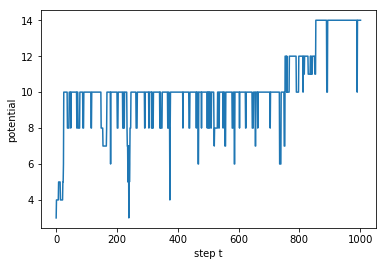

In [14]:
#plot potentials as a function of step
plt.plot(my_algo.potentials)
plt.xlabel("step t")
plt.ylabel("potential")
plt.show()

### see last positions of agents

In [15]:
my_algo.agents_pos[-1]

array([ 4, 10])

### get coverage of an agent in position 18

In [16]:
my_algo.get_coverage(agent_position=18, network_nx=my_algo.network_nx, cover_range=1)

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

### use that to make a plot

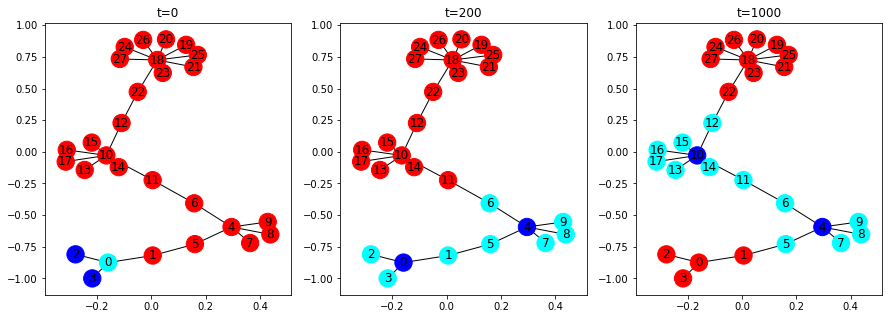

In [17]:
#see last position

plt.figure(figsize=(15,5))
pos = nx.spring_layout(my_net)

## plot t=0
plt.subplot(1,3,1)
#make node colors:
node_cols = np.zeros(my_mat.shape[0], dtype="int")
#get coverage of each agent
covered_nodes = [my_algo.get_coverage(my_algo.agents_pos[0][i], my_algo.network_nx, cover_range=1) for i in range(my_algo.n_agents)]
covered_nodes = np.unique(np.concatenate(covered_nodes))
#make colors
node_cols[covered_nodes] = 2
node_cols[my_algo.agents_pos[0]] = 1
#draw
nx.draw_networkx(nx.from_numpy_array(my_mat), pos, node_color=np.array(["red", "blue", "cyan"])[node_cols])
plt.title("t=0")

## plot t=200
plt.subplot(1,3,2)
#make node colors:
node_cols = np.zeros(my_mat.shape[0], dtype="int")
#get coverage of each agent
covered_nodes = [my_algo.get_coverage(my_algo.agents_pos[200][i], my_algo.network_nx, cover_range=1) for i in range(my_algo.n_agents)]
covered_nodes = np.unique(np.concatenate(covered_nodes))
#make colors
node_cols[covered_nodes] = 2
node_cols[my_algo.agents_pos[200]] = 1
#draw
nx.draw_networkx(nx.from_numpy_array(my_mat), pos, node_color=np.array(["red", "blue", "cyan"])[node_cols])
plt.title("t=200")

## plot last
plt.subplot(1,3,3)
#make node colors:
node_cols = np.zeros(my_mat.shape[0], dtype="int")
#get coverage of each agent
covered_nodes = [my_algo.get_coverage(my_algo.agents_pos[-1][i], my_algo.network_nx, cover_range=1) for i in range(my_algo.n_agents)]
covered_nodes = np.unique(np.concatenate(covered_nodes))
#make colors
node_cols[covered_nodes] = 2
node_cols[my_algo.agents_pos[-1]] = 1
#draw
nx.draw_networkx(nx.from_numpy_array(my_mat), pos, node_color=np.array(["red", "blue", "cyan"])[node_cols])
plt.title("t=1000")


plt.show()

### save data

In [18]:
my_algo.save_results("./demo_results")

### load data

In [19]:
demo_results = np.load("./demo_results.npy")
demo_results #first column are potentials, second column is position of agent 1, third column is position of agent 2

array([[ 3,  2,  3],
       [ 4,  0,  3],
       [ 4,  0,  3],
       ...,
       [14,  4, 10],
       [14,  4, 10],
       [14,  4, 10]])

### more help

In [20]:
help(BLLL.run) #man page of the method BLLL.run()

Help on function run in module BLLL:

run(self, t_steps=100, temperature=1)
    Method to run t_steps of the BLLL algo.
    
    Run the BLLL algo for t_steps (see ref).
    
    Args:
            t_steps (int): number of steps for the simulation.
            temperature (float): temperature of the simulation (see ref).
    Returns:
            nothing



In [21]:
help(BLLL) #complete man page of the class BLLL

Help on class BLLL in module BLLL:

class BLLL(builtins.object)
 |  Template class for BLLL algo, based on: 
 |  Yazıcıoğlu, A.Y., Egerstedt, M., and Shamma, J.S. (2013). A Game Theoretic Approach to Distributed Coverage of Graphs by Heterogeneous Mobile Agents. IFAC Proceedings Volumes 46, 309–315.
 |  
 |  Attributes:
 |          agents_pos (list[numpy.array]): list of 1d-arrays of agent positions (matrix indices), of size (n_agents)
 |          potentials (list[int]): list of potentials 
 |          
 |  Parameters:
 |          n_agents (int): number of agents. Corrected to number size of starting_positions if starting_positions is specified.
 |          starting_positions (np.array): 1-d array of starting positions. 
 |                  If None, starting positions are selected at random. 
 |          cover_ranges (int or list): cover range of the agents. either an int to be applied to all agent, 
 |                  or a list of ints representing the cover ranges for each agent
 | 

### lets get an order of idea of the runtime

In [22]:
#lets make networks of size 100,200,...,1000
networks = [nx.erdos_renyi_graph(i, 0.1) for i in np.arange(1,11)*100]

In [23]:
%%time
try1 = BLLL(n_agents=10,network_nx=networks[0])
try1.run(1000)

CPU times: user 596 ms, sys: 6.93 ms, total: 603 ms
Wall time: 637 ms


In [24]:
%%time
try2 = BLLL(n_agents=10,network_nx=networks[1])
try2.run(1000)

CPU times: user 1.06 s, sys: 11.8 ms, total: 1.07 s
Wall time: 1.14 s


In [25]:
%%time
try2 = BLLL(n_agents=10,network_nx=networks[2])
try2.run(1000)

CPU times: user 1.49 s, sys: 13.6 ms, total: 1.5 s
Wall time: 1.53 s


In [26]:
%%time
try2 = BLLL(n_agents=10,network_nx=networks[3])
try2.run(1000)

CPU times: user 2 s, sys: 18.9 ms, total: 2.02 s
Wall time: 2.06 s


In [27]:
%%time
try2 = BLLL(n_agents=10,network_nx=networks[4])
try2.run(1000)

CPU times: user 2.62 s, sys: 22.4 ms, total: 2.64 s
Wall time: 2.7 s


Seems to be linear in the number of nodes for an ER graph. should depend on the size of BFS trees (the size of the n-neighborhoods), but here it looks like it's around .5 second / 1000 steps / 100 nodes

In [28]:
%%time
try2 = BLLL(n_agents=20,network_nx=networks[4])
try2.run(1000)

CPU times: user 3.18 s, sys: 27 ms, total: 3.2 s
Wall time: 3.29 s


In [29]:
%%time
try2 = BLLL(n_agents=30,network_nx=networks[4])
try2.run(1000)

CPU times: user 3.8 s, sys: 32.5 ms, total: 3.83 s
Wall time: 3.93 s


In [30]:
%%time
try2 = BLLL(n_agents=40,network_nx=networks[4])
try2.run(1000)

CPU times: user 4.36 s, sys: 34.9 ms, total: 4.4 s
Wall time: 4.48 s


also dependent in the number of agents

## Show the effect of different temperatures

### Too hot (T=10):

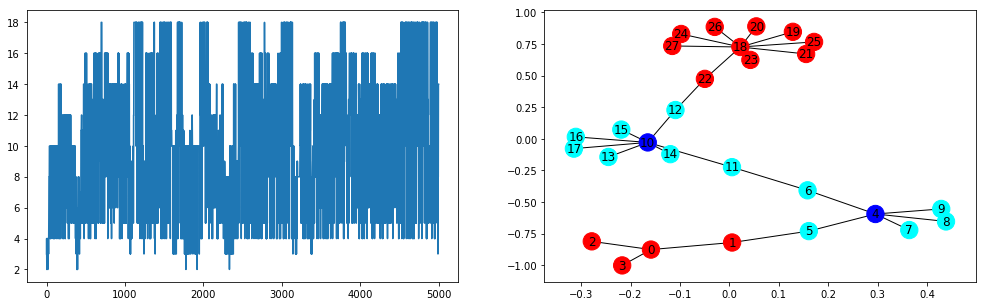

In [31]:
my_algo = BLLL(starting_positions=np.array([2,3]), network_nx=my_net, cover_ranges=1)
my_algo.run(5000, temperature=10)

plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
plt.plot(my_algo.potentials)
my_algo.agents_pos[-1]

## plot last
plt.subplot(1,2,2)
#make node colors:
node_cols = np.zeros(my_mat.shape[0], dtype="int")
#get coverage of each agent
covered_nodes = [my_algo.get_coverage(my_algo.agents_pos[-1][i], my_algo.network_nx, cover_range=1) for i in range(my_algo.n_agents)]
covered_nodes = np.unique(np.concatenate(covered_nodes))
#make colors
node_cols[covered_nodes] = 2
node_cols[my_algo.agents_pos[-1]] = 1
#draw
nx.draw_networkx(my_net, pos, node_color=np.array(["red", "blue", "cyan"])[node_cols])

### Nice and warm (T=1):

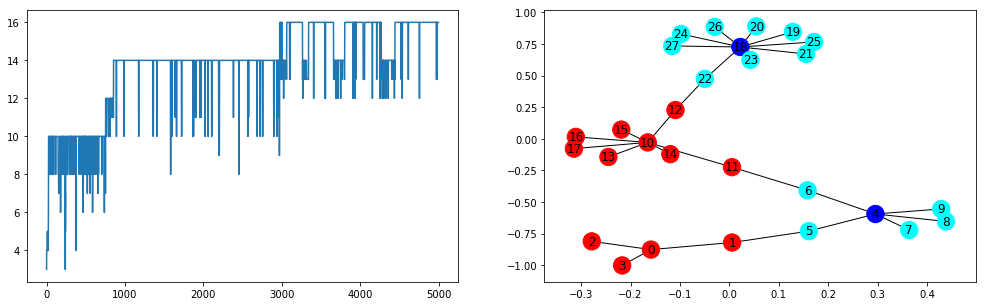

In [32]:
my_algo = BLLL(starting_positions=np.array([2,3]), network_nx=my_net, cover_ranges=1)
my_algo.run(5000, temperature=1)

plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
plt.plot(my_algo.potentials)

## plot last
plt.subplot(1,2,2)
#make node colors:
node_cols = np.zeros(my_mat.shape[0], dtype="int")
#get coverage of each agent
covered_nodes = [my_algo.get_coverage(my_algo.agents_pos[-1][i], my_algo.network_nx, cover_range=1) for i in range(my_algo.n_agents)]
covered_nodes = np.unique(np.concatenate(covered_nodes))
#make colors
node_cols[covered_nodes] = 2
node_cols[my_algo.agents_pos[-1]] = 1
#draw
nx.draw_networkx(nx.from_numpy_array(my_mat), pos, node_color=np.array(["red", "blue", "cyan"])[node_cols])

### Too cold (T=0.1):

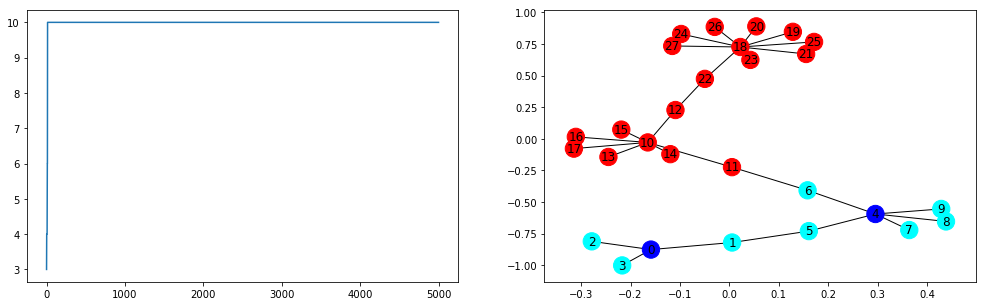

In [33]:
my_algo = BLLL(starting_positions=np.array([2,3]), network_nx=my_net, cover_ranges=1)
my_algo.run(5000, temperature=0.1)

plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
plt.plot(my_algo.potentials)
my_algo.agents_pos[-1]

## plot last
plt.subplot(1,2,2)
#make node colors:
node_cols = np.zeros(my_mat.shape[0], dtype="int")
#get coverage of each agent
covered_nodes = [my_algo.get_coverage(my_algo.agents_pos[-1][i], my_algo.network_nx, cover_range=1) for i in range(my_algo.n_agents)]
covered_nodes = np.unique(np.concatenate(covered_nodes))
#make colors
node_cols[covered_nodes] = 2
node_cols[my_algo.agents_pos[-1]] = 1
#draw
nx.draw_networkx(nx.from_numpy_array(my_mat), pos, node_color=np.array(["red", "blue", "cyan"])[node_cols])

### Linear cooling (T=10->T=0.1):

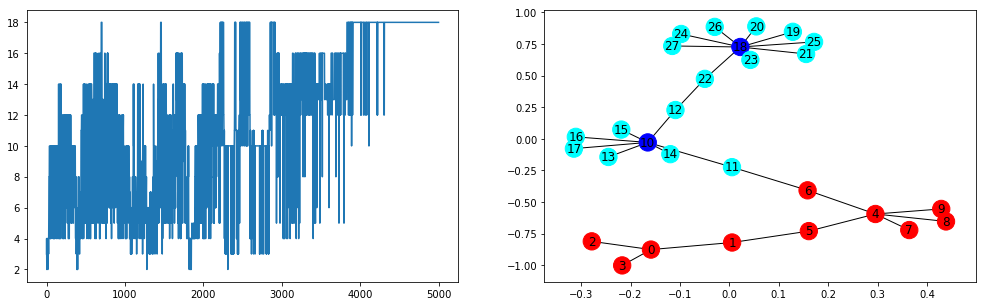

In [34]:
my_algo = BLLL(starting_positions=np.array([2,3]), network_nx=my_net, cover_ranges=1)
my_algo.run_annealing(t_steps=5000, rate="linear")

plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
plt.plot(my_algo.potentials)
my_algo.agents_pos[-1]

## plot last
plt.subplot(1,2,2)
#make node colors:
node_cols = np.zeros(my_mat.shape[0], dtype="int")
#get coverage of each agent
covered_nodes = [my_algo.get_coverage(my_algo.agents_pos[-1][i], my_algo.network_nx, cover_range=1) for i in range(my_algo.n_agents)]
covered_nodes = np.unique(np.concatenate(covered_nodes))
#make colors
node_cols[covered_nodes] = 2
node_cols[my_algo.agents_pos[-1]] = 1
#draw
nx.draw_networkx(nx.from_numpy_array(my_mat), pos, node_color=np.array(["red", "blue", "cyan"])[node_cols])

### Geometric cooling (T=10->T=0.1):

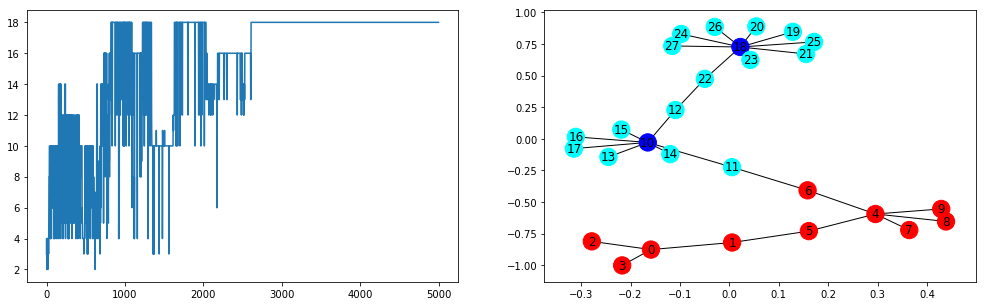

In [48]:
my_algo = BLLL(starting_positions=np.array([2,3]), network_nx=my_net, cover_ranges=1)
my_algo.run_annealing(t_steps=5000, rate="geometric")

plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
plt.plot(my_algo.potentials)
my_algo.agents_pos[-1]

## plot last
plt.subplot(1,2,2)
#make node colors:
node_cols = np.zeros(my_mat.shape[0], dtype="int")
#get coverage of each agent
covered_nodes = [my_algo.get_coverage(my_algo.agents_pos[-1][i], my_algo.network_nx, cover_range=1) for i in range(my_algo.n_agents)]
covered_nodes = np.unique(np.concatenate(covered_nodes))
#make colors
node_cols[covered_nodes] = 2
node_cols[my_algo.agents_pos[-1]] = 1
#draw
nx.draw_networkx(nx.from_numpy_array(my_mat), pos, node_color=np.array(["red", "blue", "cyan"])[node_cols])

In [36]:
# # Save a dictionary into a pickle file.
# import pickle
# pickle.dump(my_algo, open( "save.p", "wb" ))

In [37]:
# my_bla = pickle.load( open( "save.p", "rb" ) )

In [38]:
# np.exp(2) / (np.exp(2) + np.exp(1))

In [39]:
# np.exp(5) / (np.exp(5) + np.exp(4))

In [40]:
# import matplotlib
# matplotlib.use("Agg")
# import matplotlib.animation as manimation

# FFMpegWriter = manimation.writers['ffmpeg']
# metadata = dict(title='Movie_test1', artist='David')
# writer = FFMpegWriter(fps=15, metadata=metadata)

# fig = plt.figure()
# l, = plt.plot([], [], 'k-o')

# plt.xlim(-5, 5)
# plt.ylim(-5, 5)

# x0, y0 = 0, 0

# with writer.saving(fig, "writer_test.mp4", 100):
#     for i in range(100):
#         x0 += 0.1 * np.random.randn()
#         y0 += 0.1 * np.random.randn()
#         l.set_data(x0, y0)
#         writer.grab_frame()

In [41]:
# import matplotlib
# matplotlib.use("Agg")
# import matplotlib.animation as manimation

# FFMpegWriter = manimation.writers['ffmpeg']
# metadata = dict(title='Movie_test2', artist='David')
# writer = FFMpegWriter(fps=3, metadata=metadata)

# fig = plt.figure()

# my_algo = BLLL(starting_positions=np.array([2,3]), network=my_mat, cover_ranges=1)
# t_schedule = np.geomspace(10, 0.1, 5000)
    

# with writer.saving(fig, "movie3.mp4", 100):
#     for iteration in range(5000):
#         my_algo.step(temperature=t_schedule[iteration])
        
        
#         if iteration % 25 == 0:
#             ## plot last
#             #make node colors:
#             node_cols = np.zeros(my_mat.shape[0], dtype="int")
#             #get coverage of each agent
#             covered_nodes = [my_algo.get_coverage(my_algo.agents_pos[-1][i], my_algo.network_nx, cover_range=1) for i in range(my_algo.n_agents)]
#             covered_nodes = np.unique(np.concatenate(covered_nodes))
#             #make colors
#             node_cols[covered_nodes] = 2
#             node_cols[my_algo.agents_pos[-1]] = 1
#             #draw
#             nx.draw_networkx(nx.from_numpy_array(my_mat), pos, node_color=np.array(["red", "blue", "cyan"])[node_cols])
#             plt.title("iteration={:4d} , T={:.3f}".format(iteration,t_schedule[iteration]))
#             writer.grab_frame()
            

/Users/Gneiss/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/Gneiss/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


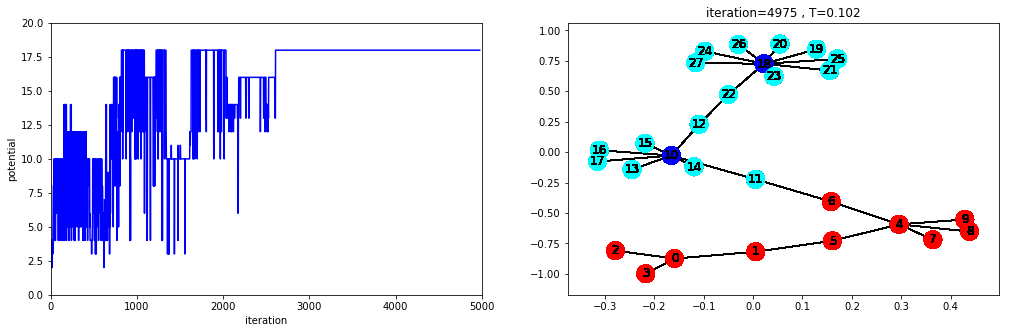

In [55]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie_test2', artist='David')
writer = FFMpegWriter(fps=3, metadata=metadata)

fig = plt.figure(figsize=(17,5))

my_algo = BLLL(starting_positions=np.array([2,3]), network_nx=my_net, cover_ranges=1)
t_schedule = np.geomspace(10, 0.1, 5000)
    

with writer.saving(fig, "movie4.mp4", 100):
    for iteration in range(5000):
        my_algo.step(temperature=t_schedule[iteration])
        
        
        if iteration % 25 == 0:
            ## plot last
            #make node colors:
            node_cols = np.zeros(my_mat.shape[0], dtype="int")
            #get coverage of each agent
            covered_nodes = [my_algo.get_coverage(my_algo.agents_pos[-1][i], my_algo.network_nx, cover_range=1) for i in range(my_algo.n_agents)]
            covered_nodes = np.unique(np.concatenate(covered_nodes))
            #make colors
            node_cols[covered_nodes] = 2
            node_cols[my_algo.agents_pos[-1]] = 1
            #draw
            plt.subplot(121)
            plt.cla()
            plt.plot(my_algo.potentials, color="blue")
            plt.xlim((0,5000))
            plt.ylim((0,20))
            plt.xlabel("iteration")
            plt.ylabel("potential")

            plt.subplot(122)
            nx.draw_networkx(nx.from_numpy_array(my_mat), pos, node_color=np.array(["red", "blue", "cyan"])[node_cols])
            plt.title("iteration={:4d} , T={:.3f}".format(iteration,t_schedule[iteration]))
            writer.grab_frame()
            